# Covid-19 em Pernambuco
    
#### Aluno: José Carlos da Silva Cruz
#### Projeto de Métodos Numéricos
#### Professor: Stefan Blawid
#### CIn-UFPE
    

<p> Para iniciar nosso modelo precisamos apresentar algumas variáveis que serão utilizadas ao decorrer deste projeto. Estas variáveis serão declaradas como funções dependentes do tempo, para assim, podermos simular com mais semelhança as mudanças que ocorreram e que poderão ocorrer durante a pandemia.</p>

##### Declaração de funções:

__A(t)__ quantidade de pessoas atuais(ativa) com a covid.<br>
__I(t)__ quantidade total de pessoas infectadas no estado.<br>
__S(t)__ quantidade de pessoas suscetíveis a contrair o vírus.<br>
__M(t)__ quantidade total de pessoas infectadas que vieram a óbito.<br>
__N__ tamanho da população Pernambucana.<br>
__β(t)__ taxa de transmissão da doença.<br>
__k(t)__ taxa de casos graves.<br>
__$\alpha$(t)__ taxa de recuperação dos atuais infectados pela covid.<br>
__R(t)__ quantidade total de pessoas recuperadas.<br>
    
obs.: Todas as funções foram declaradas como dependentes do tempo, porém, algumas devem ser constantes ou possuir "saltos". Estes saltos estão diretamente relacionados com o comportamento da população durante a pandemia.


#### Idealização dos modelos que serão utilizados
<br>  
$\dfrac{dA}{dt}=\dfrac{dI}{dt}-\dfrac{dM}{dt}-\dfrac{dR}{dt}$<br>
*A taxa da população ativa é igual a quantidade de novos infectados menos a taxa de mortes e a taxa de recuperados.*<br><br>
$\dfrac{dM}{dt}=Ak$<br>
*A taxa de mortes é igual a quantidade de pessoas com o vírus atualmente vezes a taxa de óbitos.*<br><br>
$\dfrac{dI}{dt}=A{\beta}$<br>
*A taxa de novos infectados é igual a população ativa vezes a taxa de propagação do vírus.*<br><br>
$\dfrac{dR}{dt}=A{\alpha}$<br>
*A taxa de recuperados é igual a população ativa vezes a taxa de recuperação da covid.*<br><br>

#### Soluções para modelagem

Analisando o gráfico dos novos casos e o gráfico de mortes para o estado de Pernambuco,[[7]](https://ciis.fmrp.usp.br/covid19/pe-br/) podemos representá-los usando as equações diferenciais acima apresentadas, precisando apenas descobrir quais os valores para as funções auxiliares serão necessárias para que o modelo concorde com o gráfico real da progressão da doença. Portanto, iremos dividir o gráfico real em 5 partes, 4 partes apresentadas na imagem abaixo, divididas pelas barras verticais verde, e a última parte será uma projeção.

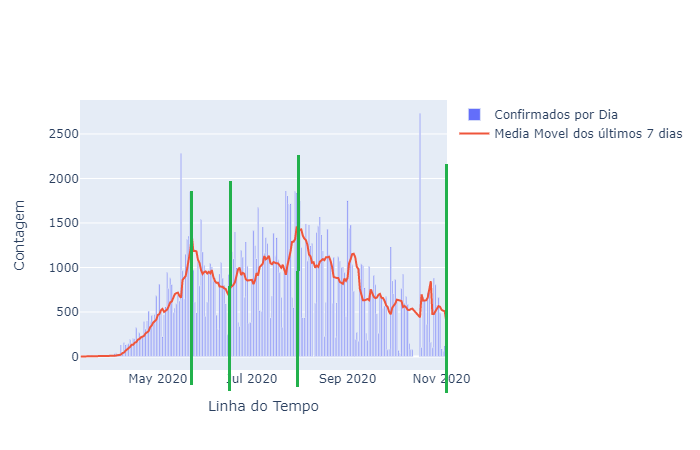

### Estratégia

Para cada bloco, precisaremos calcular qual o valor que satisfaça __k(t)__ e __$\beta(t)$__ , tais valores devem conduzir o modelo ao mais próximo possível do seu real valor. O último e mais importante bloco fará parte da projeção, portanto, valores mais próximos do cenário real nos resultará em um modelo mais confiável.

#### Funções e constantes auxiliares<br>
$N = 9.345.173$ [[1]](https://www.infoescola.com/demografia/populacao-de-pernambuco/)<br>
*população pernambucana*
<br>
##### Cáculo de $\alpha(t)$<br>
Não existem muitos dados no estado de Pernambuco relacionados à taxa de recuperados. Portanto, podemos assumir que este valor é uma constante, e que se aproxima da quantidade total de casos recuperados sobre a quantidade total de infectados.[[8]](https://dados.seplag.pe.gov.br/apps/corona.html)<br>
$\alpha = \dfrac{146752}{165273} = 0.88$
##### Cálculo de __k(t)__<br>
De acordo com um estudo baseado na análise dos dados chineses [[2]](https://g1.globo.com/ciencia-e-saude/noticia/2020/02/18/analise-de-perfil-de-44-mil-pacientes-com-coronavirus-mostra-que-80percent-dos-casos-sao-leves.ghtml), apenas 4,7% das infecções da covid apresentaram estado crítico, com 100% de morte nesses casos. Esta deve ser uma boa constante para nosso modelo. Porém, casos críticos estão relacionados a problemas respiratórios, cardíacos e a faixa etária dos pacientes, este número deve ser diferente para Pernambuco, mas não tão distante. Portanto, podemos escolher alguns pontos do gráfico real da covid e utilizarmos a fração da quantidade de mortes por novos casos.<br>
$k(t)=\dfrac{dM/dt}{dI/dt}$<br>
*Podemos coletar alguns pontos uniformemente distribuídos e retirar uma média, visualizando o gráfico real.*
##### Cálculo de __$\beta(t)$__ <br>
No início da pandemia, o aumento de infectados se dava em uma escala exponencial, pois, dobravam a quantidade de casos a cada 3 dias.[[4]](https://g1.globo.com/jornal-nacional/noticia/2020/03/23/numero-de-casos-de-coronavirus-no-brasil-esta-dobrando-a-cada-dois-ou-tres-dias.ghtml) Em Pernambuco, a taxa de transmissão estava aproximadamente 1.4 no mês de abril.[[5]](http://www.andifes.org.br/professores-do-cefet-rj-campus-petropolis-criam-site-que-monitora-avanco-da-covid-19-no-brasil/) A taxa de transmissão será calculada com base nestes dados apresentados e modelados como um gráfico variável no tempo. Contudo, o valor da taxa de transmissão apresenta uma diferença significativa se observado os 4 blocos separados acima. No início do mês de novembro a taxa de transmissão variava de 0.8 a 1.2.[[6]](http://monitorcovid.com.br/) Portanto, iremos assumir que a taxa de transmissão assumiu um valor constante durante cada bloco, porém, não deve ser o mesmo em todos. O valor desejado será encontrado com base nos dados que podemos coletar no gráfico e usando o auxílio do python para uma busca binária, para que o valor encontrado se comporte semelhante ao valor real.<br>

### Bloco 1

##### 12 de março até 23 de maio (73 dias)
*início com 1 caso, 0 mortes<br>
término com 26786 casos, 2144 mortes*<br>

Podemos, analisando o gráfico de casos e óbitos,[[7]](https://ciis.fmrp.usp.br/covid19/pe-br/) assumir que __k(t)__ se aproxima de:<br>

In [1]:
k = 2144/26786
print("k = ",k)

k =  0.0800418128873292


Para o cálculo de $\beta(t)$ iremos utilizar a busca binária no intervalo real $[0,10]$ com aproximação de 4 casas decimais.<br>

beta =  1.0644908342510462
total de infectados =  14408.58649449157
total de obitos =  1082.7776834455096


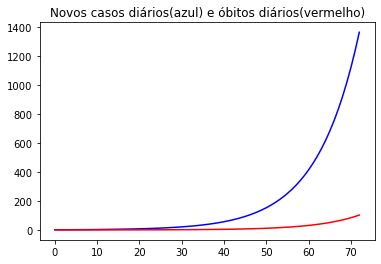

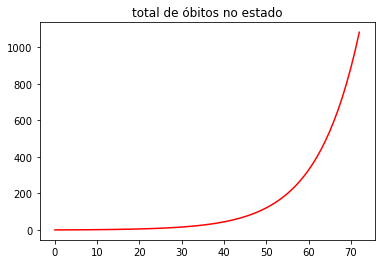

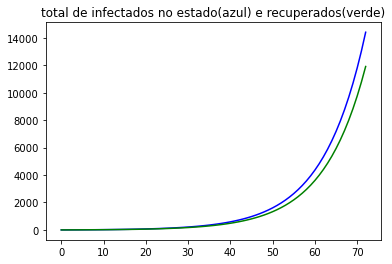

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time

def getBeta(t,beta):
    return beta
    
def getK(t):
    return 0.08

def getAlpha(t):
    return 0.88

def draw(dias,casos,obitos,recup,ativos):
    
    plt.plot(dias,casos,color = 'blue')
    plt.plot(dias,obitos,color = 'red')
    plt.title("Novos casos diários(azul) e óbitos diários(vermelho)")
    plt.show()
    soma = 0
    total = []
    for i in range(len(obitos)):
        soma += obitos[i]
        total.append(soma)
    plt.plot(dias,total,color = 'red')
    plt.title("total de óbitos no estado")
    plt.show()
    soma = 0
    total.clear()
    for i in range(len(obitos)):
        soma += casos[i]
        total.append(soma)
    plt.plot(dias,total,color = 'blue')
    plt.plot(dias,recup,color = 'green')
    plt.title("total de infectados no estado(azul) e recuperados(verde)")
    plt.show()
    
    
def simulator(period,beta):

    I = 1
    S = 9345173
    N = 9345173
    R = 0
    totalObt = 0
    obt = []
    casos = []
    recup = []
    A = 1
    ativos = []
    last = 0
    for i in range(period):
    	dI = A*getBeta(i,beta)
    	dM = A*getK(i)
    	dR = A*getAlpha(i)
    	#
    	dA = dI - dM - dR
    	#
    	I += dI
    	totalObt += dM
    	R += dR
    	A += dA
    	#
    	ativos.append(A)
    	recup.append(R)
    	obt.append(dM)
    	casos.append(dI)
    	last = dI

    return (I,totalObt,obt,casos,recup,ativos,last)
    
def binarySearch():
    
    f2 = 1364 #casos diarios marcado
    s = 0
    e = 10
    period = 73 # bloco 1
    
    for i in range(30):
        p = (s+e)/2
        result = simulator(period,p)
        total = result[6]
        if total > f2:
            e = p
        else:
            s = p
    print("beta = ",s)
    result = simulator(period,s)
    print("total de infectados = ",result[0])
    print("total de obitos = ",result[1])
    return (result[3],result[2],result[4],result[5])
    

def main():
    
    tupla = binarySearch()
    casos = tupla[0]
    obitos = tupla[1]
    recup = tupla[2]
    ativos = tupla[3]
    dias = []
    for i in range(len(casos)):
        dias.append(i)
    draw(dias,casos,obitos,recup,ativos)
    
if __name__ == "__main__":
    main()

##### análise do bloco 1

Embora o gráfico apresente uma diferença na quantidade de casos por dia, o modelo respeita, aproximadamente, a quantidade total de infectados e a quantidade de mortes. Percebe-se que a função cresce de modo semelhante ao caso real, como uma exponencial. Concluímos então o bloco 1.

### Bloco 2

##### 24 de maio até 15 de junho (23 dias)
*início com 26786 casos, 2144 mortes<br>
término com 45507 casos, 3886 mortes*<br>

Como mostra o gráfico anteriormente apresentado, neste período ocorreu uma queda dos casos diários, o que interrompeu o crescimento exponencial. Neste período o governo do estado declarou lockdown em algumas cidades,[[8]](https://www.legisweb.com.br/legislacao/?id=395175#:~:text=3%C2%BA%20Fica%20estabelecida%2C%20no%20per%C3%ADodo,Mata%20e%20Jaboat%C3%A3o%20dos%20Guararapes.) pode-se observar que o lockdown afetou positivamente contra o avanço do vírus.
Mais uma vez, neste período, podemos assumir que __k(t)__ se aproxima de média entre a taxa de novos casos sobre a taxa de óbitos durante este perído:<br>

In [3]:
kt = (3886-2144)/(45507 - 26786)
print("k = ",kt)

k =  0.09305058490465253


Usaremos o mesmo raciocínio, no cálculo de $\beta(t)$, usado no bloco 1.

beta =  0.939099146053195
total de infectados =  39411.72704628789
total de obitos =  3528.5132028155003


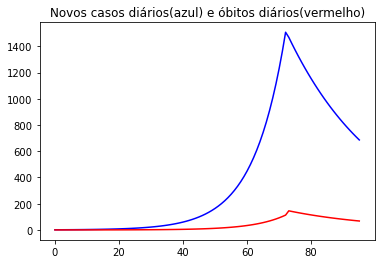

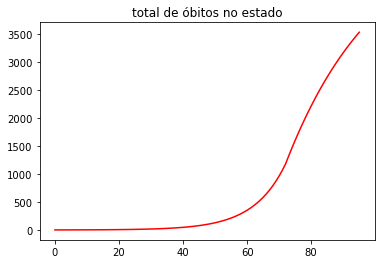

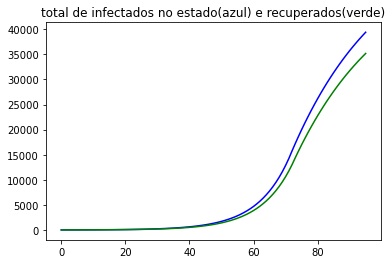

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import time

def getBeta(t,beta):
    if t < 73:
        return 1.066
    return beta
    
def getK(t):
    if t < 73:
        return 0.08
    return 0.0931

def getAlpha(t):
    return 0.88

def draw(dias,casos,obitos,recup,ativos):
    
    plt.plot(dias,casos,color = 'blue')
    plt.plot(dias,obitos,color = 'red')
    plt.title("Novos casos diários(azul) e óbitos diários(vermelho)")
    plt.show()
    soma = 0
    total = []
    for i in range(len(obitos)):
        soma += obitos[i]
        total.append(soma)
    plt.plot(dias,total,color = 'red')
    plt.title("total de óbitos no estado")
    plt.show()
    soma = 0
    total.clear()
    for i in range(len(obitos)):
        soma += casos[i]
        total.append(soma)
    plt.plot(dias,total,color = 'blue')
    plt.plot(dias,recup,color = 'green')
    plt.title("total de infectados no estado(azul) e recuperados(verde)")
    plt.show()
    
    
def simulator(period,beta):

    I = 1
    S = 9345173
    N = 9345173
    R = 0
    totalObt = 0
    obt = []
    casos = []
    recup = []
    A = 1
    ativos = []
    last = 0
    for i in range(period):
        dI = A*getBeta(i,beta)
        dM = A*getK(i)
        dR = A*getAlpha(i)
        #
        dA = dI - dM - dR
        #
        I += dI
        totalObt += dM
        R += dR
        A += dA
        #
        ativos.append(A)
        recup.append(R)
        obt.append(dM)
        casos.append(dI)
        last = dI

    return (I,totalObt,obt,casos,recup,ativos,last)
    
def binarySearch():
    
    f2 = 686 #ultimo caso diario marcado
    s = 0
    e = 10
    period = 73 + 23 # bloco 1 + bloco 2
    
    for i in range(30):
        p = (s+e)/2
        result = simulator(period,p)
        total = result[6]
        if total > f2:
            e = p
        else:
            s = p
    print("beta = ",s)
    result = simulator(period,s)
    print("total de infectados = ",result[0])
    print("total de obitos = ",result[1])
    return (result[3],result[2],result[4],result[5])
    

def main():
    
    tupla = binarySearch()
    casos = tupla[0]
    obitos = tupla[1]
    recup = tupla[2]
    ativos = tupla[3]
    dias = []
    for i in range(len(casos)):
        dias.append(i)
    draw(dias,casos,obitos,recup,ativos)
    
if __name__ == "__main__":
    main()

##### análise do bloco 2

Como esperado, mesmo havendo divergência no somatório de casos, nosso modelo consegue representar aproximadamente o gráfico esperado. Isso se dá pois escolhemos as constantes de forma inteligente, analisando os dados fornecidos e anteriormente apresentados.

### Bloco 3

##### 16 de junho até 30 de julho(45 dias)
*início com 45507 casos, 3886 mortes<br>
término com 93373 casos, 7574 mortes*<br>

Neste período os casos voltaram a aumentar, porém, houve pequenos períodos de crescimento e decrescimento. Usaremos o mesmo código e lógica para a resolução deste bloco.<br>

In [5]:
k = (7574 - 3886)/(93373 - 45507)
print("k = ",k)

k =  0.07704842685831279


beta =  0.9749159868806601
total de infectados =  84360.92344666769
total de obitos =  7074.6303725914995


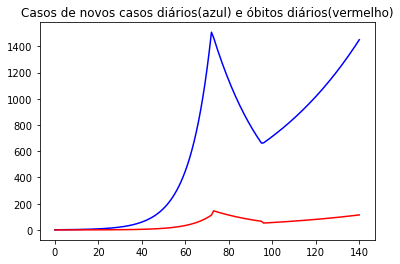

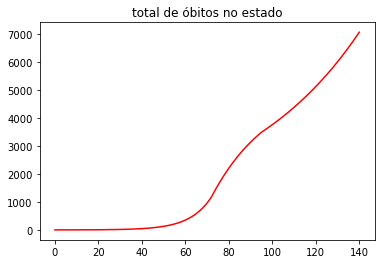

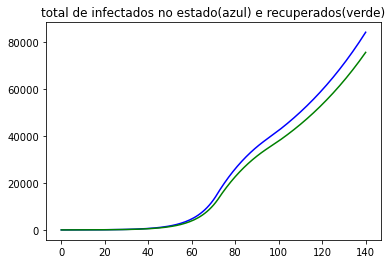

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import time

def getBeta(t,beta):
    if t < 73:
        return 1.066
    if t < 96:
        return 0.9376
    return beta
    
def getK(t):
    if t < 73:
        return 0.08
    if t < 96:
        return 0.0931
    return 0.077

def getAlpha(t):
    return 0.88

def draw(dias,casos,obitos,recup,ativos):
    
    plt.plot(dias,casos,color = 'blue')
    plt.plot(dias,obitos,color = 'red')
    plt.title("Casos de novos casos diários(azul) e óbitos diários(vermelho)")
    plt.show()
    soma = 0
    total = []
    for i in range(len(obitos)):
        soma += obitos[i]
        total.append(soma)
    plt.plot(dias,total,color = 'red')
    plt.title("total de óbitos no estado")
    plt.show()
    soma = 0
    total.clear()
    for i in range(len(obitos)):
        soma += casos[i]
        total.append(soma)
    plt.plot(dias,total,color = 'blue')
    plt.plot(dias,recup,color = 'green')
    plt.title("total de infectados no estado(azul) e recuperados(verde)")
    plt.show()
    
    
def simulator(period,beta):

    I = 1
    S = 9345173
    N = 9345173
    R = 0
    totalObt = 0
    obt = []
    casos = []
    recup = []
    A = 1
    ativos = []
    last = 0
    for i in range(period):
        dI = A*getBeta(i,beta)
        dM = A*getK(i)
        dR = A*getAlpha(i)
        #
        dA = dI - dM - dR
        #
        I += dI
        totalObt += dM
        R += dR
        A += dA
        #
        ativos.append(A)
        recup.append(R)
        obt.append(dM)
        casos.append(dI)
        last = dI

    return (I,totalObt,obt,casos,recup,ativos,last)
    
def binarySearch():
    
    f2 = 1450 # ultima quantidade diaria de novos casos
    s = 0
    e = 10
    period = 73 + 23 +45 # bloco 1 + bloco 2 + bloco 3
    
    for i in range(30):
        p = (s+e)/2
        result = simulator(period,p)
        total = result[6]
        if total > f2:
            e = p
        else:
            s = p
    print("beta = ",s)
    result = simulator(period,s)
    print("total de infectados = ",result[0])
    print("total de obitos = ",result[1])
    return (result[3],result[2],result[4],result[5])
    

def main():
    
    tupla = binarySearch()
    casos = tupla[0]
    obitos = tupla[1]
    recup = tupla[2]
    ativos = tupla[3]
    dias = []
    for i in range(len(casos)):
        dias.append(i)
    draw(dias,casos,obitos,recup,ativos)
    
if __name__ == "__main__":
    main()

##### análise do bloco 3

Este foi um caso especial, pois, dentro do bloco havia alguns picos e vales. A ideia que pouparia recursos seria simplificar em um único crescimento. O próximo modelo usará a mesma lógica.

### Bloco 4

##### 31 de julho até 1 de novembro (94 dias)
*início com 93373 casos, 7574 mortes<br>
término com 162977 casos, 8632 mortes*<br>

Neste último bloco, calcularemos o avanço da pandemia no estado por um longo período, erros de aproximação são esperados. Este bloco será usado para o cálculo da previsão dos próximos meses.<br>

In [7]:
k = (8632 - 7574)/(162977 - 93373)
print("k = ",k)

k =  0.015200275846215736


Perceba que neste último bloco a taxa de mortes caiu drásticamente. Apenas 1% dos casos são considerados fatais.

beta =  0.8851615153253078
total de infectados =  166068.61625282484
total de obitos =  8476.629945140934


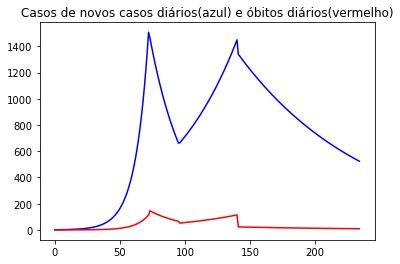

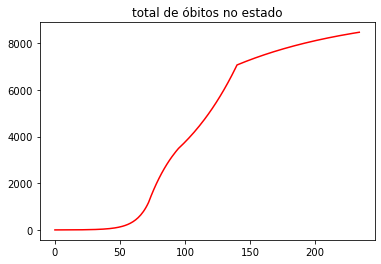

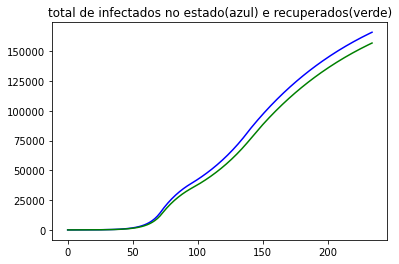

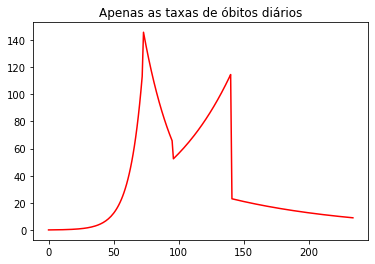

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import time

def getBeta(t,beta):
    if t < 73:
        return 1.066
    if t < 96:
        return 0.9376
    if t < 141:
        return 0.9749
    return beta
    
def getK(t):
    if t < 73:
        return 0.08
    if t < 96:
        return 0.0931
    if t < 141:
        return 0.077
    return 0.0152

def getAlpha(t):
    return 0.88

def draw(dias,casos,obitos,recup,ativos):
    
    plt.plot(dias,casos,color = 'blue')
    plt.plot(dias,obitos,color = 'red')
    plt.title("Casos de novos casos diários(azul) e óbitos diários(vermelho)")
    plt.show()
    soma = 0
    total = []
    for i in range(len(obitos)):
        soma += obitos[i]
        total.append(soma)
    plt.plot(dias,total,color = 'red')
    plt.title("total de óbitos no estado")
    plt.show()
    soma = 0
    total.clear()
    for i in range(len(obitos)):
        soma += casos[i]
        total.append(soma)
    plt.plot(dias,total,color = 'blue')
    plt.plot(dias,recup,color = 'green')
    plt.title("total de infectados no estado(azul) e recuperados(verde)")
    plt.show()
    plt.plot(dias,obitos,color = 'red')
    plt.title("Apenas as taxas de óbitos diários")
    plt.show()
    
    
def simulator(period,beta):

    I = 1
    S = 9345173
    N = 9345173
    R = 0
    totalObt = 0
    obt = []
    casos = []
    recup = []
    A = 1
    ativos = []
    last = 0
    for i in range(period):
        dI = A*getBeta(i,beta)
        dM = A*getK(i)
        dR = A*getAlpha(i)
        #
        dA = dI - dM - dR
        #
        I += dI
        totalObt += dM
        R += dR
        A += dA
        #
        ativos.append(A)
        recup.append(R)
        obt.append(dM)
        casos.append(dI)
        last = dI

    return (I,totalObt,obt,casos,recup,ativos,last)
    
def binarySearch():
    
    f2 = 524 # ultima quantidade diaria de novos casos
    s = 0
    e = 10
    period = 73 + 23 +45 + 94 # bloco 1 + bloco 2 + bloco 3 + bloco 4
    
    for i in range(30):
        p = (s+e)/2
        result = simulator(period,p)
        total = result[6]
        if total > f2:
            e = p
        else:
            s = p
    print("beta = ",s)
    result = simulator(period,s)
    print("total de infectados = ",result[0])
    print("total de obitos = ",result[1])
    return (result[3],result[2],result[4],result[5])
    

def main():
    
    tupla = binarySearch()
    casos = tupla[0]
    obitos = tupla[1]
    recup = tupla[2]
    ativos = tupla[3]
    dias = []
    for i in range(len(casos)):
        dias.append(i)
    draw(dias,casos,obitos,recup,ativos)
    
if __name__ == "__main__":
    main()

##### análise do bloco 4

Neste último caso, pode-se observar que visualmente o gráfico apresentado é semelhante ao gráfico real.[[7]](https://ciis.fmrp.usp.br/covid19/pe-br/) O somatório de infectados e o somatório de mortes está muito próximo do valor esperado. Convém apresentar o gráfico das mortes diárias separadamente neste último caso para melhor visualização.

### análise geral

Sabemos que quanto maior a quantidade de blocos, mais o gráfico se aproximaria visualmente do gráfico real. Vale salientar que assumimos que a taxa de transmissão, recuperação e óbitos eram constantes durante certos períodos, isto é uma má aproximação, pois os valores mudam a cada dia. Contudo, o valor final de óbitos e infecções se aproximaram dos valores reais, o que foi um bom avanço graças ao modelo e escolha de constantes no modelo. Observe também que os gráficos possuem alguns "saltos", isto é esperado, pois não colocamos nenhum tipo de transição suave ao trocar os valores das constantes.

## Previsão

Usando os dados do último bloco, iremos assumir que as constantes continuarão com os dados inalterados. A pergunta a se responder são:<br><br>
*Qual a data para que o estado zere todos os casos?*<br>
*Quantas pessoas serão vítimas da covid no total?*<br>
*Quantas pessoas serão infectadas no total?*<br><br>

É aqui que daremos uma resposta aproximada a estas perguntas e mostraremos seus gráficos. Nosso código passará por uma pequena modificação. __Não será necessária a busca binária para encontrar um novo valor para $\beta(t)$, pois, assumiremos agora que permancerão inalterados.__ Iremos simular dia após dia.

dia com menos de 50 casos ativos =  480
dia final =  869
total de infectados =  218174.8549185522
total de obitos =  9371.298741132437


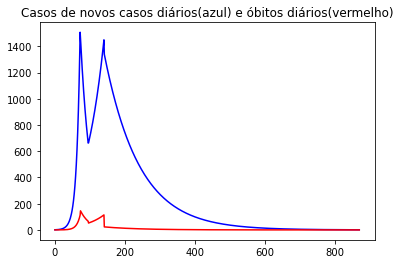

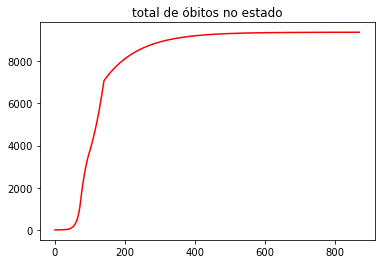

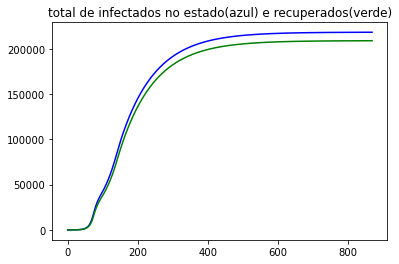

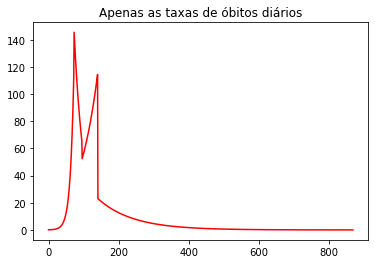

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import time

def getBeta(t):
    if t < 73:
        return 1.066
    if t < 96:
        return 0.9376
    if t < 141:
        return 0.9749
    return 0.8852 # valor a ser assumido nas nossas previsoes (este valor foi determinado pela BB no bloco 4)
    
def getK(t):
    if t < 73:
        return 0.08
    if t < 96:
        return 0.0931
    if t < 141:
        return 0.077
    return 0.0152 # a taxa de obitos permanecera a mesma

def getAlpha(t):
    return 0.88

def draw(dias,casos,obitos,recup,ativos):
    
    plt.plot(dias,casos,color = 'blue')
    plt.plot(dias,obitos,color = 'red')
    plt.title("Casos de novos casos diários(azul) e óbitos diários(vermelho)")
    plt.show()
    soma = 0
    total = []
    for i in range(len(obitos)):
        soma += obitos[i]
        total.append(soma)
    plt.plot(dias,total,color = 'red')
    plt.title("total de óbitos no estado")
    plt.show()
    soma = 0
    total.clear()
    for i in range(len(obitos)):
        soma += casos[i]
        total.append(soma)
    plt.plot(dias,total,color = 'blue')
    plt.plot(dias,recup,color = 'green')
    plt.title("total de infectados no estado(azul) e recuperados(verde)")
    plt.show()
    plt.plot(dias,obitos,color = 'red')
    plt.title("Apenas as taxas de óbitos diários")
    plt.show()
    
    
def simulator():

    I = 1
    S = 9345173
    N = 9345173
    R = 0
    totalObt = 0
    obt = []
    casos = []
    recup = []
    A = 1
    ativos = []
    last = 0
    flag = False
    for i in range(3650):
        dI = A*getBeta(i)
        dM = A*getK(i)
        dR = A*getAlpha(i)
        #
        dA = dI - dM - dR
        #
        I += dI
        totalObt += dM
        R += dR
        A += dA
        #
        ativos.append(A)
        recup.append(R)
        obt.append(dM)
        casos.append(dI)
        last = dI
        if A < 50 and flag == False and i > 141:
            print("dia com menos de 50 casos ativos = ",i)
            flag = True
        if A < 1:
            print("dia final = ",i)
            break # zerados todos os casos

    return (I,totalObt,obt,casos,recup,ativos,last)
    
def predict():
  
    result = simulator()
    print("total de infectados = ",result[0])
    print("total de obitos = ",result[1])
    return (result[3],result[2],result[4],result[5])
    

def main():
    
    tupla = predict()
    casos = tupla[0]
    obitos = tupla[1]
    recup = tupla[2]
    ativos = tupla[3]
    dias = []
    for i in range(len(casos)):
        dias.append(i)
    draw(dias,casos,obitos,recup,ativos)
    
if __name__ == "__main__":
    main()

## Conclusão

De acordo com o modelo apresentado, 218.175 pessoas serão infectadas pela covid em Pernambuco e 9.371 pessoas serão as vítimias fatais do vírus, no total. O modelo nos informa também que, se assim permanecer a taxa de recuperação, mortes e contágio, no dia 4 de julho de 2021, o estado apresentará menos de 50 casos de covid. No dia 28 de julho de 2022 o estado zerará os casos. Portanto, para diminuir a data para estes acontecimentos é necessário ter todos os cuidados como o uso de máscara e álcool gel. Diminuindo a taxa de contágio e aumentando a taxa de recuperação, o estado consegue zerar em menos tempo que o apresentado.

### Referências
<br>
[1] População pernambucana: https://www.infoescola.com/demografia/populacao-de-pernambuco/ <br>
[2] Casos críticos na China: https://g1.globo.com/ciencia-e-saude/noticia/2020/02/18/analise-de-perfil-de-44-mil-pacientes-com-coronavirus-mostra-que-80percent-dos-casos-sao-leves.ghtml<br>
[3] dias de isolamento para casos leves: https://noticias.uol.com.br/saude/ultimas-noticias/bbc/2020/04/26/coronavirus-quanto-tempo-uma-pessoa-leva-para-se-recuperar-da-covid-1.htm#:~:text=Eles%20s%C3%A3o%20levados%20ent%C3%A3o%20para,per%C3%ADodo%20passado%20em%20uma%20UTI.<br>
[4] número de casos dobram a cada 3 dias: https://g1.globo.com/jornal-nacional/noticia/2020/03/23/numero-de-casos-de-coronavirus-no-brasil-esta-dobrando-a-cada-dois-ou-tres-dias.ghtml<br>
[5] taxa em abril: http://www.andifes.org.br/professores-do-cefet-rj-campus-petropolis-criam-site-que-monitora-avanco-da-covid-19-no-brasil/<br>
[6] gráficos rt: http://monitorcovid.com.br/<br>
[7] dados completos da covid em Pernambuco: https://ciis.fmrp.usp.br/covid19/pe-br/<br>
[8] decreto de lockdown no estado: https://www.legisweb.com.br/legislacao/?id=395175#:~:text=3%C2%BA%20Fica%20estabelecida%2C%20no%20per%C3%ADodo,Mata%20e%20Jaboat%C3%A3o%20dos%20Guararapes.<br>
[8] dados totais de Pernambuco: https://dados.seplag.pe.gov.br/apps/corona.html<br>
